#TALLER 04 ANNY ZURLEY DIOSA, SARA CARVAJAL

#1. Movimiento de proyectiles en presencia de viento.

Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y 
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pylab as plt
from scipy import optimize
from scipy.interpolate import lagrange
import scipy

# Parametros iniciales 

v0 = 60 #Velocidad en m/s
alpha = np.pi #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = v0/2             #rapidez del viento
b = 0.05             #Parametro de friccion 
g = 9.8                #Aceleracion de la gravedad m/s2

Params = (alpha, v0, b, u,g)  #Parametros en tupla.


# Posicion en x
def pos_x(t, theta, v0, u, alpha, g, b):  
  x1 =  (u * np.cos(alpha))*t
  x2 =  (1./b)*(v0*np.cos(theta) - u*np.cos(alpha))
  x3 =  1-np.exp(-b*t)
  x = x1 + x2 * x3   
  return x

def pos_y(t,theta,v0, u, alpha, g, b):  
  x1 = (1/b) * (g/b + v0 * np.sin(theta) - u*np.sin(alpha))
  x2 =  1-np.exp(-b * t)
  x3 =  (g/b - u * np.sin(alpha))*t
  y = x1*x2 - x3 
  return y 



In [ ]:
#Creación del diccionario 

params = theta, v0 , u, alpha,  g, b
t = np.linspace(0, 20, 1000)

x = pos_x(t, *params)
y = pos_y(t, *params)

dic= {"X": x,"Y":y,"Tiempo":t}

df=pd.DataFrame.from_dict(dic)
df


,X,Y,Tiempo
0,0.000000,0.000000,0.00000
1,0.848652,0.846989,0.02002
2,1.695854,1.689205,0.04004
3,2.541608,2.526653,0.06006
4,3.385914,3.359336,0.08008
...,...,...,...
995,315.908872,-897.057712,19.91992
996,315.843561,-899.219473,19.93994
997,315.777714,-901.382998,19.95996
998,315.711332,-903.548284,19.97998


Text(0, 0.5, 'y')

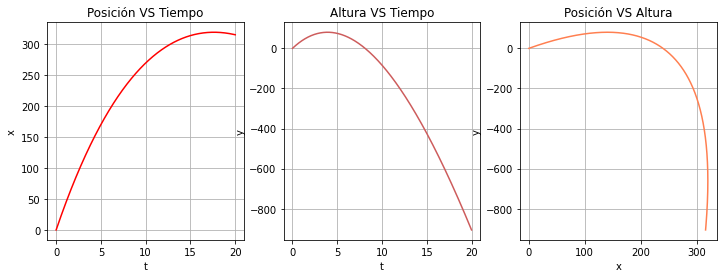

In [ ]:
#Gráfico de x en funcion de t

plt.figure(figsize = (12,4))
plt.subplot(131)
plt.grid()
plt.title("Posición VS Tiempo")
plt.plot(df.Tiempo,df.X, "r")
plt.xlabel("t")
plt.ylabel("x")

plt.subplot(132)
plt.grid()
plt.title("Altura VS Tiempo")
plt.plot(df.Tiempo, df.Y, "indianred")
plt.xlabel("t")
plt.ylabel("y")

plt.subplot(133)
plt.grid()
plt.title("Posición VS Altura")
plt.plot(df.X, df.Y,"coral")
plt.xlabel("x")
plt.ylabel("y")

In [ ]:
#Alcance máximo de la particula, queremos buscar la raiz de Y

xmx= (v0**2)*np.sin(2*theta)/g
ymx= (v0**2)*(np.sin(theta)**2)/2*g

print(f"El alcance máximo de la particula en x es {xmx} m/s")
print(f"El alcance máximo de la particula en y es {ymx} m/s")

El alcance máximo de la particula en x es 367.3469387755102 m/s
El alcance máximo de la particula en y es 8819.999999999998 m/s


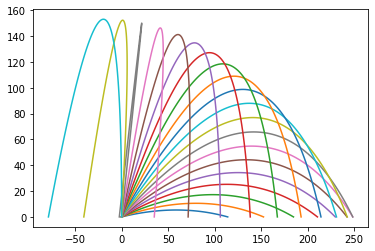

In [ ]:
theta_=np.linspace(10,90,20)
detheta= np.deg2rad(theta_)
pos=np.zeros(len(theta_))
tv= np.zeros(len(theta_))

for i,t in enumerate(detheta):
  params= t, v0 , u, alpha,  g, b   #Parámetros que necesito para llamar el diccionario 
  Tiempo_= optimize.newton(pos_y, 10, args=(params))
  tv[i]= Tiempo_
  pos[i]= pos_x(Tiempo_, *params)
  t=np.linspace(0,Tiempo_,100)
  plt.plot(pos_x(t, *params), pos_y(t, *params))


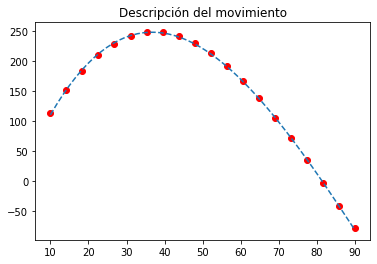

In [ ]:
#INTERPOLACIÓN

plt.plot(theta_,pos,"ro")
plt.title("Descripción del movimiento")

coeffs=np.polyfit(theta_,pos,deg=3)
np.poly1d(coeffs).roots

P=np.poly1d(coeffs)

x_=np.linspace(10,90,50)
plt.plot(x_,P(x_),'--')


#2. INTERPOLACIÓN DE LAGRANGE

Consideremos la función: 
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

 1. Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$.

Text(0.5, 1.0, 'n=8')

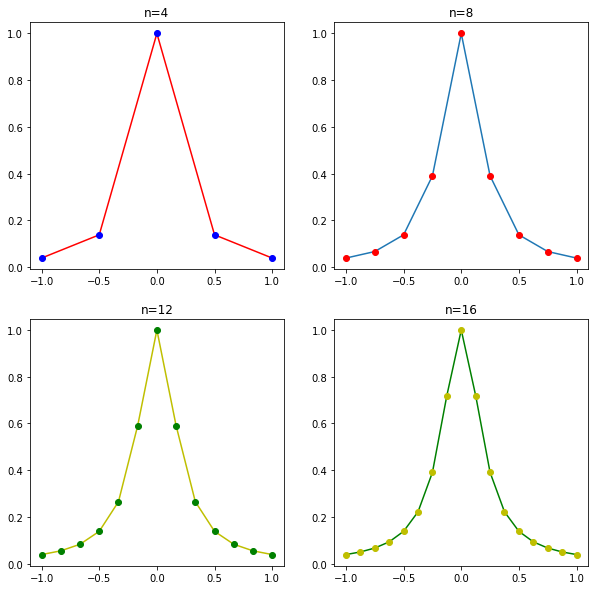

In [ ]:

import sympy as sp
import numpy as np
import matplotlib.pylab as plt
from scipy.interpolate import lagrange
import math as mt

func = lambda x: 1/(1+25*x**2)

n= np.linspace(-1,1,5)
n1= np.linspace(-1,1,9)
n2= np.linspace(-1,1,13)
n3= np.linspace(-1,1,17)
n4= np.linspace(-1,1,21)

x = sp.symbols("x")
p=lagrange(n,func(n))
p1=lagrange(n1,func(n1))
p2=lagrange(n2,func(n2))
p3=lagrange(n3,func(n3))
p4=lagrange(n4,func(n4))



fig, axs = plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(10)
plt.title("n=16")

axs[0,0].plot(n,p(n),"r")
axs[0,0].plot(n,func(n),"bo")

axs[0,1].plot(n1,p1(n1),"")
axs[0,1].plot(n1,func(n1),"ro")

axs[1,0].plot(n2,p2(n2),"y")
axs[1,0].plot(n2,func(n2),"go")

axs[1,1].plot(n3,p3(n3),"g")
axs[1,1].plot(n3,func(n3),"yo")

axs[0, 0].set_title("n=4")

axs[1, 0].set_title("n=12")
axs[0, 1].set_title("n=8")


La cota del  error , viene dado por: 
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation}

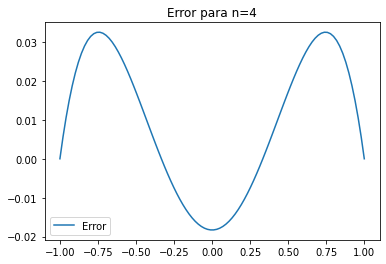

In [ ]:
def error(f,n):
    dfn = sp.diff(func(x),x, n+1)
    fxn = sp.lambdify(x,f5)
    xi = np.linspace(-1,1,n)
    xp = np.linspace(-1,1,100)
    err = (1/mt.factorial(n+1))*fxn(1)

    a=np.zeros(100)
    for k in range(100):
        pr=1
        for i in range(n):
            pr=pr*(xp[k]-xi[i])
        
        a[k]=err*pr       
    
    plt.plot(xp,a,label='Error')
    plt.title('Error para n=%d' %n)
    plt.legend()
    plt.show()

error(func,4)

#3. INTERPOLACIÓN DE HERMITE#
Consideremos la función: 
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

1. Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$. 

/usr/local/lib/python3.7/dist-packages/numpy/polynomial/hermite.py:1403: RankWarning: The fit may be poorly conditioned
  return pu._fit(hermvander, x, y, deg, rcond, full, w)


Text(0.5, 1.0, 'n=8')

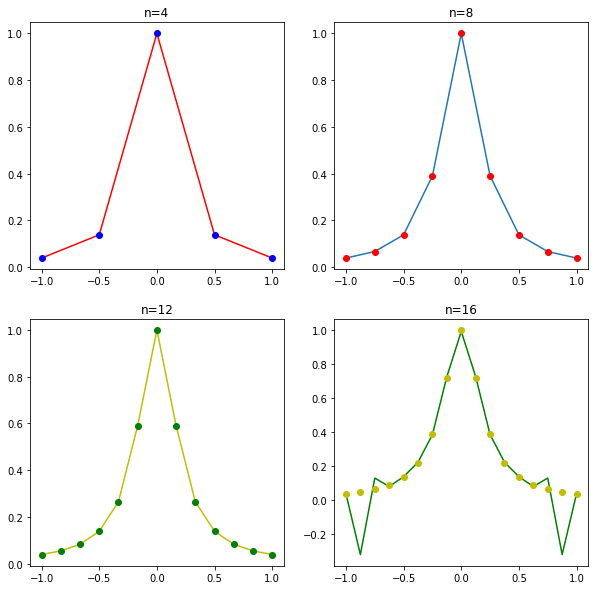

In [ ]:

import sympy as sp
import numpy as np
import matplotlib.pylab as plt
from scipy.interpolate import lagrange
import math as mt


n= np.linspace(-1,1,5)
n1= np.linspace(-1,1,9)
n2= np.linspace(-1,1,13)
n3= np.linspace(-1,1,17)
n4= np.linspace(-1,1,21)

pol = np.polynomial.hermite.Hermite.fit(n,func(n), 4)
pol1 = np.polynomial.hermite.Hermite.fit(n1,func(n1), 10)
pol2 = np.polynomial.hermite.Hermite.fit(n2,func(n2), 12)
pol3 = np.polynomial.hermite.Hermite.fit(n3,func(n3), 15)
pol4 = np.polynomial.hermite.Hermite.fit(n4,func(n4), 20)

fig, axs = plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(10)
plt.title("n=16")

axs[0,0].plot(n,pol(n),"r")
axs[0,0].plot(n,func(n),"bo")

axs[0,1].plot(n1,pol1(n1),"")
axs[0,1].plot(n1,func(n1),"ro")

axs[1,0].plot(n2,pol2(n2),"y")
axs[1,0].plot(n2,func(n2),"go")

axs[1,1].plot(n3,pol4(n3),"g")
axs[1,1].plot(n3,func(n3),"yo")

axs[0, 0].set_title("n=4")

axs[1, 0].set_title("n=12")
axs[0, 1].set_title("n=8")

La cota del  error , viene dado por: 

$$
  f(x)-p_{2n+1}(x)
  = \frac{f^{2n+2}(\xi)}{(2n+2)!} (x-x_0)^2(x-x_1)^2(x-x_2)^2,
$$

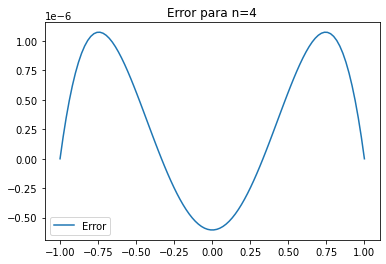

In [ ]:
#Calculamos el error del metodo de interpolación
def errorh(f,n):
    dfn = sp.diff(func(x),x, 2*n+2)
    fxn = sp.lambdify(x,f5)
    xi = np.linspace(-1,1,n)
    xp = np.linspace(-1,1,100)
    err = (1/mt.factorial(2*n+2))*fxn(1)

    a=np.zeros(100)
    for k in range(100):
        pr=1
        for i in range(n):
            pr=pr*(xp[k]-xi[i])
        
        a[k]=err*pr       
    
    plt.plot(xp,a,label='Error')
    plt.title('Error para n=%d' %n)
    plt.legend()
    plt.show()

# Grafica del error para n=4
errorh(func,4)

#4. SPLINE CÚBICO 

Consideremos la imagen ![paloma](https://github.com/hernansalinas/Metodos_Computacionales_taller/blob/main/Asignaciones/Tareas/Enunciados_2021_02/figuras/Fig.png?raw=true)

In [ ]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd 
from scipy.interpolate import lagrange
from scipy.interpolate import CubicSpline

In [ ]:
x=np.array([0.9,1.3,1.9,2.1,2.6,3.0,3.9,4.4,4.7,5.0,6.0,7.0,8.0,9.2,10.5,11.3,11.6,12.0,12.6,13.0,13.3])
y=np.array([1.3,1.5,1.85,2.1,2.6,2.7,2.4,2.15,2.05,2.1,2.25,2.3,2.25,1.95,1.4,0.9,0.7,0.6,0.5,0.4,0.25])

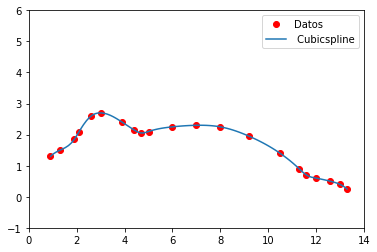

In [ ]:
cs = CubicSpline(x, y)
xs = np.linspace(0.9, 13.3, 100)

plt.plot(x, y,"ro", label= "Datos")
plt.plot(xs, cs(xs), label= " Cubicspline" )
plt.legend()
plt.xlim(0,14)
plt.ylim(-1,6)
plt.show()

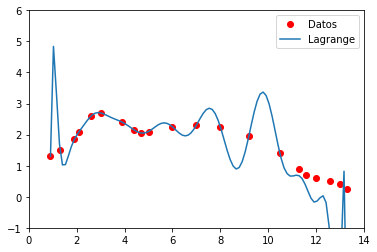

In [ ]:
x_ = np.linspace(0.9, 13.3, 100)
poly = lagrange(x, y)
plt.plot(x, y,"ro", label= "Datos")
plt.plot(x_, poly(x_), "-", label= "Lagrange")
plt.legend()
plt.xlim(0,14)
plt.ylim(-1,6)
plt.show()

In [ ]:
print(poly) #Polinomio

            20             19             18             17
-3.075e-11 x  + 4.279e-09 x  - 2.773e-07 x  + 1.111e-05 x 
              16            15           14         13         12
 - 0.0003082 x  + 0.006286 x  - 0.09769 x  + 1.183 x  - 11.32 x 
          11         10        9        8             7             6
 + 86.25 x  - 525.8 x  + 2564 x - 9969 x + 3.068e+04 x - 7.387e+04 x
              5             4           3             2
 + 1.368e+05 x - 1.899e+05 x + 1.9e+05 x - 1.287e+05 x + 5.246e+04 x - 9653


Se puede observar que el metodo que funciona perfecto es el de CubicSpline, ya que describe todos los puntos y forma el contorno de la Paloma, al contrario de la interpolación de Lagrange que tiene a oscilar en sus extremos por que usa polinomios muy grandes en este caso de grado 20